In [6]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.signal as signal

In [8]:
# Number of coefficients
taps = 51

# 100 MHz sampling frequency and 100 KHz cutoff frequency
f_samp = 500e6
f_nyq = f_samp / 2.0
f_cutoff = 100e6

# For digital filter, cutoff frequency must be specified relative to sampling frequency
f_cutoff_norm = f_cutoff/f_nyq

In [9]:
coeffs = signal.firwin(taps, f_cutoff_norm)

#Get frequency response of filter
w_rads, h = signal.freqz(coeffs, worN = 10000)

#signal.freqz gives x-axis in rad/samples so convert to Hz
w_Hz = (w_rads/np.pi)*f_nyq

# Frequency normalized to sampling frequency
w_Hz_norm = w_Hz / f_samp

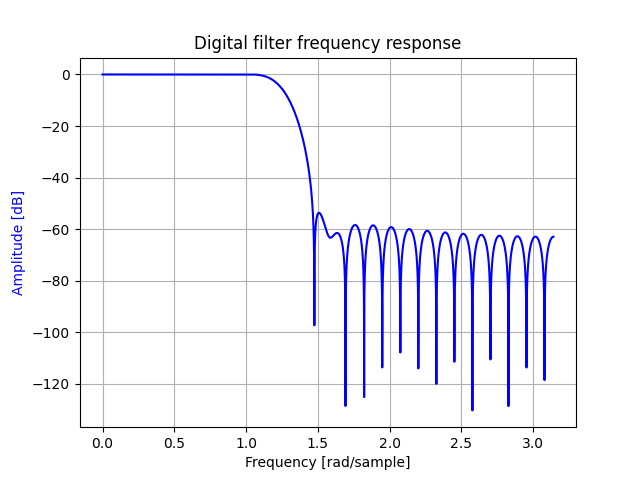

In [8]:
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w_rads, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.grid()
ax1.axis('tight')
plt.show()

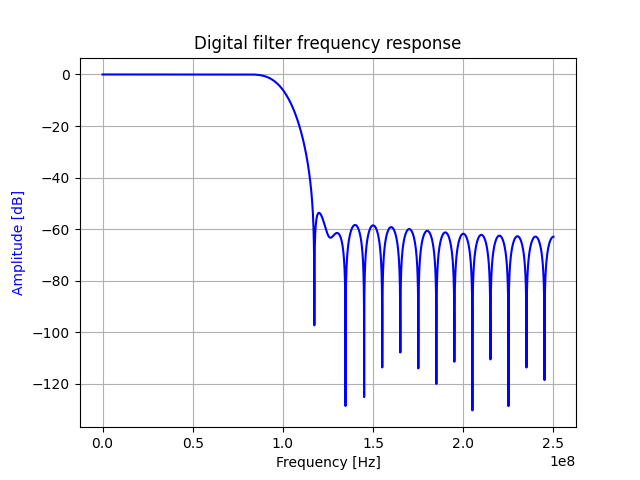

In [9]:
fig, ax2 = plt.subplots()
ax2.set_title('Digital filter frequency response')
ax2.plot(w_Hz, 20 * np.log10(abs(h)), 'b')
ax2.set_ylabel('Amplitude [dB]', color='b')
ax2.set_xlabel('Frequency [Hz]')
ax2.grid()
ax2.axis('tight')
# plt.xlim(0.15, 0.25) 
# plt.ylim(-52, 0)
plt.show()

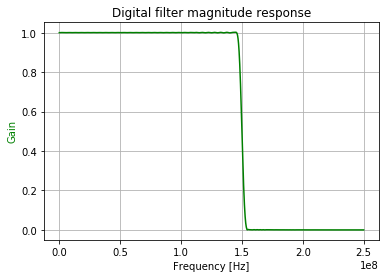

In [152]:
# Magnintude response
fig, ax3 = plt.subplots()
ax3.set_title('Digital filter magnitude response')
ax3.plot(w_Hz, abs(h), 'g')
ax3.set_ylabel('Gain', color='g')
ax3.set_xlabel('Frequency [Hz]')
ax3.grid()
ax3.axis('tight')
plt.show()

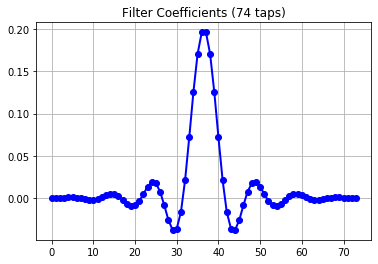

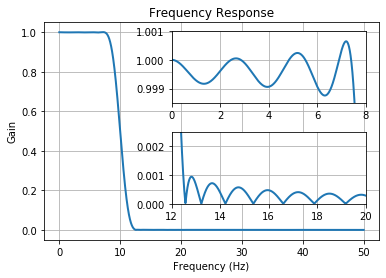

In [153]:
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show


#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------

sample_rate = 100.0
nsamples = 400
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)


#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 10.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)

#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------

figure(1)
plot(taps, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % N)
grid(True)

#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

# Upper inset plot.
ax1 = axes([0.42, 0.6, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)

# Lower inset plot
ax2 = axes([0.42, 0.25, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(12.0, 20.0)
ylim(0.0, 0.0025)
grid(True)

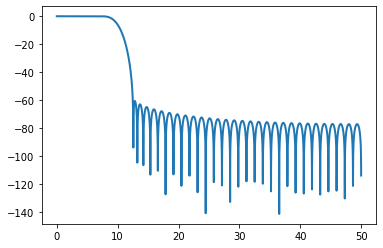

In [154]:
plot((w/pi)*nyq_rate, 20 * np.log10(abs(h)), linewidth=2)

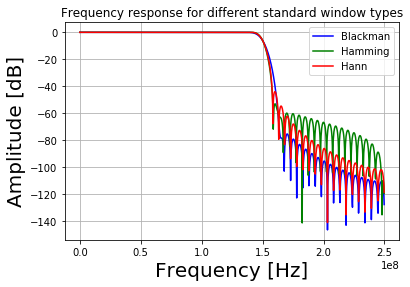

In [22]:
# Plot frequency response of some common windows
# Number of coefficients
taps = 100

# 100 MHz sampling frequency and 100 KHz cutoff frequency
f_samp = 500e6
f_nyq = f_samp / 2.0
f_cutoff = 150e6

# For digital filter, cutoff frequency must be specified relative to sampling frequency
f_cutoff_norm = f_cutoff/f_nyq

coeffs_blackman = signal.firwin(taps, f_cutoff_norm, window = 'blackman')
coeffs_hamming = signal.firwin(taps, f_cutoff_norm, window = 'hamming')
coeffs_hann = signal.firwin(taps, f_cutoff_norm, window = 'hann')
coeffs_kaiser = signal.firwin(taps, f_cutoff_norm, window = ('kaiser', 2))
coeffs_gaussian = signal.firwin(taps, f_cutoff_norm, window = ('gaussian', 3))
coeffs_cheb = signal.firwin(taps, f_cutoff_norm, window = ('chebwin', 50))

coeffs = [coeffs_blackman, coeffs_hamming, coeffs_hann, coeffs_kaiser, coeffs_gaussian, coeffs_cheb]

#Get frequency response of filter
w_array = []
h_array = []

for i in range(len(coeffs)):
    w_temp, h_temp = signal.freqz(coeffs[i], worN = 1000)
    w_array.append(w_temp)
    h_array.append(h_temp)
    
# Normalize to Hz
w_hz_array = []

for i in range(len(coeffs)):
    w_hz_array.append(w_array[i]*(f_nyq/np.pi))

w_hz_norm_array = []

for i in range(len(coeffs)):
    w_hz_norm_array.append(w_hz_array[i]/f_samp)

fig, ax2 = plt.subplots()
ax2.set_title('Frequency response for different standard window types')
ax2.plot(w_hz_array[0], 20 * np.log10(abs(h_array[0])), 'b', label = 'Blackman')
ax2.plot(w_hz_array[1], 20 * np.log10(abs(h_array[1])), 'g', label = 'Hamming')
ax2.plot(w_hz_array[2], 20 * np.log10(abs(h_array[2])), 'r', label = 'Hann')
# ax2.plot(w_hz_array[4], 20 * np.log10(abs(h_array[4])), 'm', label = 'Gaussian')
# ax2.plot(w_hz_array[3], 20 * np.log10(abs(h_array[3])), 'c', label = 'Kaiser')
# ax2.plot(w_hz_array[5], 20 * np.log10(abs(h_array[5])), 'y', label = 'Chebyshev')
ax2.set_ylabel('Amplitude [dB]')
ax2.set_xlabel('Frequency [Hz]')
ax2.grid()
ax2.legend()
ax2.axis('tight')
# plt.xlim(0, 1.5e8) 
# plt.ylim(-0.1, 0.1)
ax2.xaxis.label.set_size(20)
ax2.yaxis.label.set_size(20)

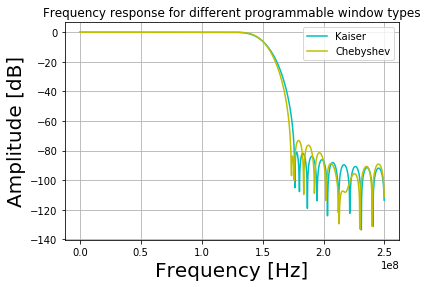

In [23]:
# Help choose between Kaiser and Chebyshev
taps = 50
coeffs_k = signal.firwin(taps, f_cutoff_norm, window = ('kaiser', 8))
coeffs_c = signal.firwin(taps, f_cutoff_norm, window = ('chebwin', 60))
w_k, h_k = signal.freqz(coeffs_k, worN = 1000)
w_c, h_c = signal.freqz(coeffs_c, worN = 1000)
w_hz_k = w_k*(f_nyq/np.pi)
w_hz_c = w_c*(f_nyq/np.pi)

fig, ax3 = plt.subplots()
ax3.set_title('Frequency response for different programmable window types')
ax3.plot(w_hz_k, 20 * np.log10(abs(h_k)), 'c', label = 'Kaiser')
ax3.plot(w_hz_c, 20 * np.log10(abs(h_c)), 'y', label = 'Chebyshev')
ax3.set_ylabel('Amplitude [dB]')
ax3.set_xlabel('Frequency [Hz]')
ax3.grid()
ax3.legend()
ax3.axis('tight')
# plt.xlim(1.3e8, 1.8e8) 
# plt.ylim(-0.1, 0.1)
ax3.xaxis.label.set_size(20)
ax3.yaxis.label.set_size(20)
plt.show()

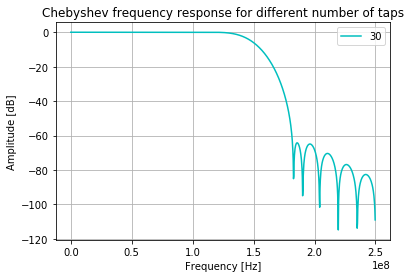

In [24]:
# Help choosing number of taps
taps = 10
coeffs_10 = signal.firwin(taps, f_cutoff_norm, window = ('chebwin', 50))
w_10, h_10 = signal.freqz(coeffs_10, worN = 1000)
w_hz_10 = w_10*(f_nyq/np.pi)

taps = 20
coeffs_20 = signal.firwin(taps, f_cutoff_norm, window = ('chebwin', 50))
w_20, h_20 = signal.freqz(coeffs_20, worN = 1000)

taps = 30
coeffs_30 = signal.firwin(taps, f_cutoff_norm, window = ('chebwin', 50))
w_30, h_30 = signal.freqz(coeffs_30, worN = 1000)

taps = 40
coeffs_40 = signal.firwin(taps, f_cutoff_norm, window = ('chebwin', 50))
w_40, h_40 = signal.freqz(coeffs_40, worN = 1000)

taps = 50
coeffs_50 = signal.firwin(taps, f_cutoff_norm, window = ('chebwin', 50))
w_50, h_50 = signal.freqz(coeffs_50, worN = 1000)

taps = 60
coeffs_60 = signal.firwin(taps, f_cutoff_norm, window = ('chebwin', 50))
w_60, h_60 = signal.freqz(coeffs_60, worN = 1000)

taps = 70
coeffs_70 = signal.firwin(taps, f_cutoff_norm, window = ('chebwin', 50))
w_70, h_70 = signal.freqz(coeffs_70, worN = 1000)

taps = 80
coeffs_80 = signal.firwin(taps, f_cutoff_norm, window = ('chebwin', 50))
w_80, h_80 = signal.freqz(coeffs_80, worN = 1000)

taps = 90
coeffs_90 = signal.firwin(taps, f_cutoff_norm, window = ('chebwin', 50))
w_90, h_90 = signal.freqz(coeffs_90, worN = 1000)

taps = 100
coeffs_100 = signal.firwin(taps, f_cutoff_norm, window = ('chebwin', 50))
w_100, h_100 = signal.freqz(coeffs_100, worN = 1000)

h_vector = [h_10, h_20, h_30, h_40, h_50, h_60, h_70, h_80, h_90, h_100]

fig, ax4 = plt.subplots()
ax4.set_title('Chebyshev frequency response for different number of taps')
# ax4.plot(w_hz_5, 20 * np.log10(abs(h_5)), 'r', label = '5')
# ax4.plot(w_hz_10, 20 * np.log10(abs(h_10)), 'b', label = '10')
# ax4.plot(w_hz_15, 20 * np.log10(abs(h_15)), 'g', label = '15')
# ax4.plot(w_hz_20, 20 * np.log10(abs(h_20)), 'm', label = '20')
ax4.plot(w_hz_10, 20 * np.log10(abs(h_30)), 'c', label = '30')
# ax4.plot(w_hz_40, 20 * np.log10(abs(h_40)), 'y', label = '40')
# ax4.plot(w_hz_50, 20 * np.log10(abs(h_50)), 'k', label = '50')
# ax4.plot(w_hz_60, 20 * np.log10(abs(h_60)), 'r', label = '60')
ax4.set_ylabel('Amplitude [dB]')
ax4.set_xlabel('Frequency [Hz]')
ax4.grid()
ax4.legend()
ax4.axis('tight')
# plt.xlim(1.43e8, 1.74e8) 
# plt.ylim(-0.1, 0.1)
plt.show()

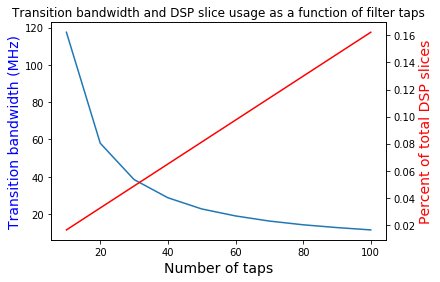

In [31]:
passband = []
stopband = []
for i in h_vector:
    for j in range(len(i)):
        if (20 * np.log10(abs(i[j]))) < -3:
            passband.append(j)
            break
            
for i in h_vector:
    for j in range(len(i)):
        if (20 * np.log10(abs(i[j]))) < -60:
            stopband.append(j)
            break
            
transition = []
for i in range(len(h_vector)):
    wp = w_hz_10[passband[i]]
    ws = w_hz_10[stopband[i]]
    tran = (ws - wp) / 1e6
    transition.append(tran)
    
percent = []
for i in transition:
    percent.append(i/150)
taps_vector = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
dsp_slices = []
for i in taps_vector:
    dsp_slices.append(i*(5/2)/1540)

fig, ax1 = plt.subplots()
ax1.plot(taps_vector, transition)
ax1.set_xlabel('Number of taps')
ax1.set_ylabel('Transition bandwidth (MHz)')
ax1.set_title("Transition bandwidth and DSP slice usage as a function of filter taps")
ax2 = ax1.twinx()
ax2.plot(taps_vector, dsp_slices, 'r')
ax2.set_ylabel("Percent of total DSP slices")
ax2.xaxis.label.set_size(14)
ax2.yaxis.label.set_size(14)
ax1.xaxis.label.set_size(14)
ax1.yaxis.label.set_size(14)

ax1.yaxis.label.set_color('blue')        #setting up X-axis label color to yellow
ax2.yaxis.label.set_color('red')          #setting up Y-axis label color to blue

# ax2.tick_params(axis='x', colors='red')    #setting up X-axis tick color to red
# ax2.tick_params(axis='y', colors='black')

plt.show()

CPU times: user 14.6 ms, sys: 1.56 ms, total: 16.2 ms
Wall time: 15.3 ms


848826363.1567751

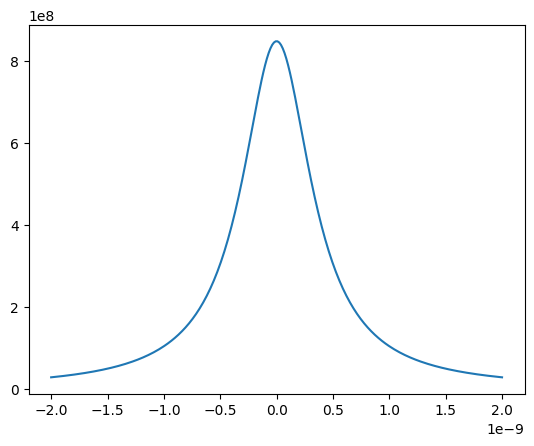

In [80]:
%%time
## ^^^ this to track the time taken for this cell

## Define functions that you are sampling the electric field or intensity of 
def test_func(x):
    # return (np.sin(x))**2 * (np.sin(x + 1))**2
    return np.sin(x)
def gaussian(t):
    return np.exp(-2*np.log(2)*(t/tau)**2)
def lorentzian(t):
    return (1/np.pi)*((tau/2)/(t**2 + (tau/2)**2))

## Parameters for the Gaussian function
tau = 7.5e-10

## Total number of sampled points
total_time = 256
start = -2e-9
end = 2e-9
time = np.linspace(start, end, total_time)
time_step = (end - start) / (total_time - 1)

## Calculate value of function at previously specified time points
yvals = []
for i in time:
    yvals.append(gaussian(i))
    
lvals = []
for i in time:
    lvals.append(lorentzian(i))

## The lag value corresponding to deltaT value in autocorrelation equation
lag = time_step*4
index_lag = round(lag/time_step)
num = 0
denom = 0
result = 0

for i in time:
    num += gaussian(i) * gaussian(i - lag)
    denom += gaussian(i)**2
    
plt.plot(time, lvals)

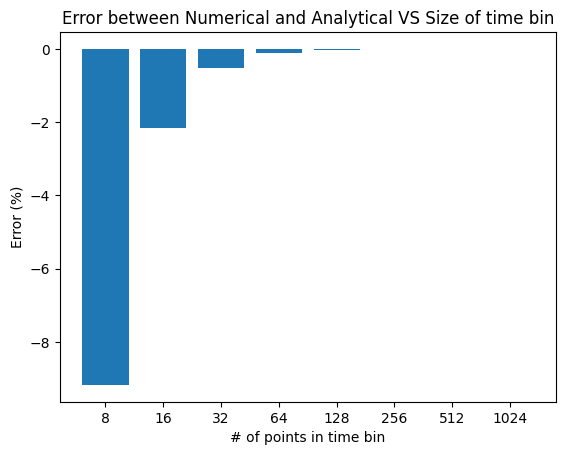

In [358]:
## Calculate difference between analytical and numerical for lag = 1 and different time bin vals
analytical = []
numerical = []

## Iterate through different sizes of time bins
for j in range(1,11):
    
    tau = 7.5e-10
    total_time = 2**j
    start = -2e-9
    end = 2e-9
    time = np.linspace(start, end, total_time)
    time_step = (end - start) / (total_time - 1)
    
    ## Calculate analytical value through integral 
    anal_lag = 1
    numerator = integrate.quad(lambda t: (np.exp(-2*np.log(2)*(t/tau)**2))*(np.exp(-2*np.log(2)*((t+anal_lag*time_step)/tau)**2)), -2e-9, +2e-9)
    denominator = integrate.quad(lambda t: (np.exp(-2*np.log(2)*(t/tau)**2))**2, -2e-9, +2e-9)
    analytical.append(numerator[0]/denominator[0])
    
    ## Calculate ACF at lag = 1 for different time bins
    lag_results = []
    for i in range(len(time)):
        lag = time[i]
        index_lag = round(lag/time_step)
        num = 0
        denom = 0
        result = 0

        for i in time:
            num += gaussian(i) * gaussian(i - lag)
            denom += gaussian(i)**2
        lag_results.append(num/denom)   
    numerical.append(lag_results[int(len(lag_results)/2)])

## Calculate error between numerical and anlytical value
num_anal_error = []
for i in range(2, len(numerical)):
    error = (numerical[i] - analytical[-1])/analytical[-1]
    num_anal_error.append(error*100)
    
## Graph bar chart
time_bin_time = ['8', '16', '32', '64', '128', '256', '512', '1024']
bars = plt.bar(time_bin_time, num_anal_error)
plt.ylabel('Error (%)')
plt.xlabel('# of points in time bin')
plt.title('Error between Numerical and Analytical VS Size of time bin')
plt.show() 

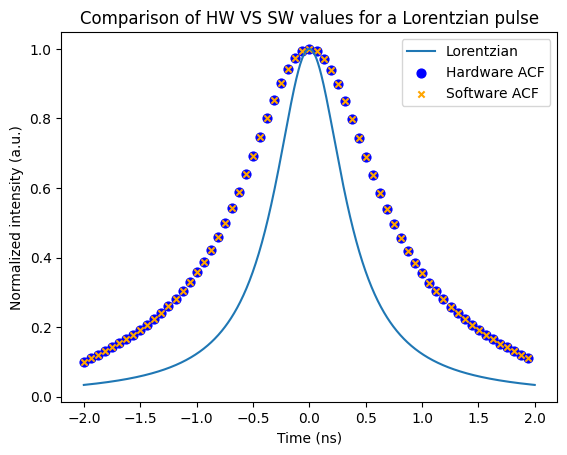

In [83]:
## Calculate ACF at a variety of lag values with both software and hardware

tau = 7.5e-10
total_time = 1024
start = -2e-9
end = 2e-9
time = np.linspace(start, end, total_time)
time_step = (end - start) / (total_time - 1)
yvals = []
for i in time:
    yvals.append(lorentzian(i))
    
## Calculate ACF at every 16th lag to comfortably show on graph
lag_results = []
lag_time = []
for i in range(len(time)):
    if (i % 16 == 0):
        lag = time[i]
        lag_time.append(time[i])
        index_lag = round(lag/time_step)
        num = 0
        denom = 0
        result = 0

        for i in time:
            num += lorentzian(i) * lorentzian(i - lag)
            denom += lorentzian(i)**2
        lag_results.append(num/denom)

## Normalize to nanoseconds
time_norm = []
lag_time_norm = []
for i in range(len(time)):
    time_norm.append(time[i]*1e9)
for i in range(len(lag_time)):
    lag_time_norm.append(lag_time[i]*1e9)
for i in range(len(yvals)):
    yvals[i] = yvals[i]/lorentzian(0)
    
## Plot graph
plt.plot(time_norm, yvals, label = 'Lorentzian')
plt.scatter(lag_time_norm, lag_results, s = 40, color = 'b', label = 'Hardware ACF')
plt.scatter(lag_time_norm, lag_results, s = 20, marker = 'x', color = 'orange', label = 'Software ACF')
plt.xlabel('Time (ns)')
plt.ylabel('Normalized intensity (a.u.)')
plt.title('Comparison of HW VS SW values for a Lorentzian pulse')
plt.legend()
plt.show()

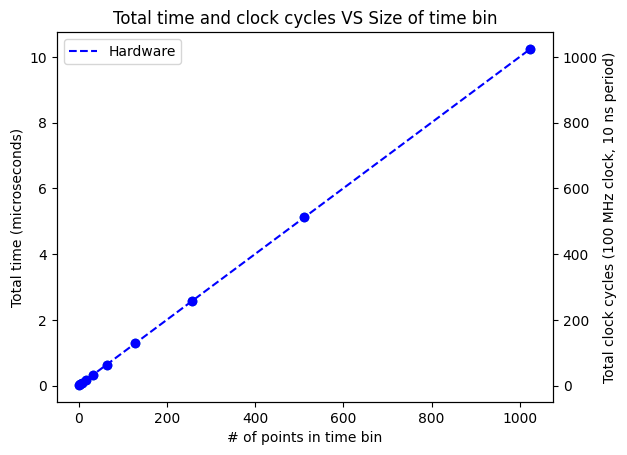

In [5]:
## Calculate ACF time in hardware for different time bin vals

time_bin = []
for i in range(1, 11):
    time_bin.append(2**i)

## This software time comes from manual collection using the %%time Python operator 
sw_time = [187, 193, 324, 445, 680, 1630, 3230, 5440, 7810, 28200] ## microseconds

## Calculate number of clock cycles
clk_cyc = 10
time_bin_time = []
for i in time_bin:
    time_bin_time.append(i*10/1000)
    
## Plot graph
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.scatter(time_bin, time_bin_time)
ax2.plot(time_bin, time_bin,'b--', label = 'Hardware')
ax2.scatter(time_bin, time_bin, color = 'b')

ax1.set_xlabel('# of points in time bin')
ax1.set_ylabel('Total time (microseconds)')
ax2.set_ylabel('Total clock cycles (100 MHz clock, 10 ns period)')

ax1.set_title('Total time and clock cycles VS Size of time bin')
ax2.legend()

plt.show()

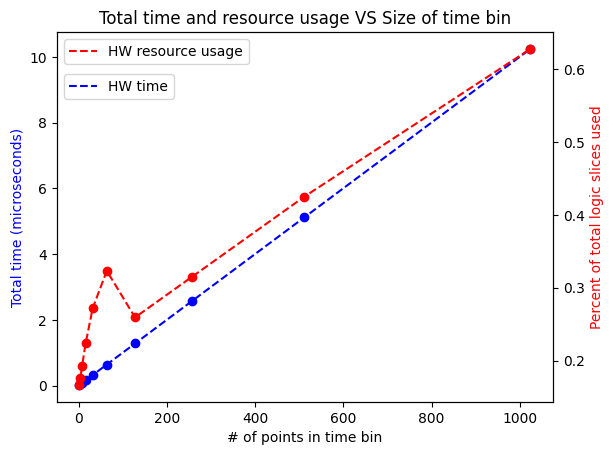

In [68]:
## Calculate memory usage as a function of time bin size (fixed at 1 lag)
time_bin_memory = [593, 625, 686, 796, 968, 1151, 923, 1120, 1514, 2236] ## LUTs 
for i in range(len(time_bin_memory)):
    time_bin_memory[i] = (time_bin_memory[i]/356160)*100

fig, ax5 = plt.subplots()

ax6 = ax5.twinx()

ax5.scatter(time_bin, time_bin_time, color = 'b')
ax5.plot(time_bin, time_bin_time,'b--', label = 'HW time')
ax6.scatter(time_bin, time_bin_memory, color = 'r')
ax6.plot(time_bin, time_bin_memory,'r--', label = 'HW resource usage')

ax5.set_xlabel('# of points in time bin')
ax5.set_ylabel('Total time (microseconds)')
ax6.set_ylabel('Percent of total logic slices used')

ax5.set_title('Total time and resource usage VS Size of time bin')
ax6.legend()
ax5.legend(bbox_to_anchor=(0,0.8), loc = 'lower left')

ax5.yaxis.label.set_color('blue') 
ax6.yaxis.label.set_color('red') 

plt.show()

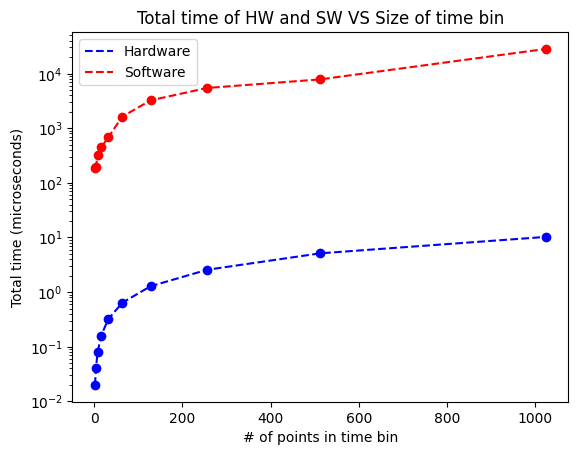

In [291]:
## Plot HW and SW time

fig1, ax3 = plt.subplots()

ax3.scatter(time_bin, time_bin_time, color = 'b')
ax3.plot(time_bin, time_bin_time, 'b--', label = 'Hardware')
ax3.scatter(time_bin, sw_time, color = 'r')
ax3.plot(time_bin, sw_time, 'r--', label = "Software")

ax3.set_yscale('log')
ax3.legend()

ax3.set_xlabel('# of points in time bin')
ax3.set_ylabel('Total time (microseconds)')
ax3.set_title('Total time of HW and SW VS Size of time bin')

plt.show()

Text(0.5, 1.0, 'Error due to clock cycle mismatch')

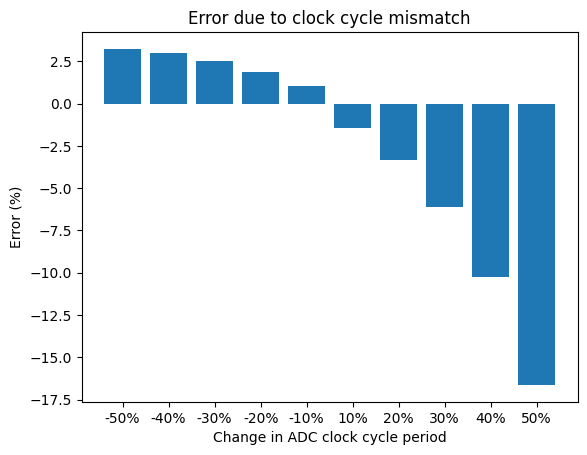

In [3]:
## Calculating error for changing adc timing
## Values exported from HW design in systemverilog
actual  = 0.94116024
shift = ['-50%', '-40%', '-30%', '-20%', '-10%', '10%', '20%', '30%', '40%', '50%']
shifted_val = [0.97156097, 0.96934315, 0.96463486, 0.95864410, 0.95107543, 0.92782065, 0.90958589, 0.88351130, 0.84489764, 0.78461081]
shift_error = []

## Calculate error
for i in shifted_val:
    shift_error.append(((i-actual)/actual) * 100)
    
## Plot graph
plt.bar(shift, shift_error)
plt.xlabel('Change in ADC clock cycle period')
plt.ylabel('Error (%)')
plt.title("Error due to clock cycle mismatch")

In [361]:
## Testing time as a function of lag count for hardware and software

tau = 7.5e-10
total_time = 1024
start = -2e-9
end = 2e-9
time = np.linspace(start, end, total_time)
time_step = (end - start) / (total_time - 1)

yvals = []
for i in time:
    yvals.append(gaussian(i))

In [363]:
%%time

## Manually measure the time for 1-100 lag values using time operator
lag_results = []
lag_time = []
for i in range(100):
    lag = time[i]
    lag_time.append(time[i])
    index_lag = round(lag/time_step)
    num = 0
    denom = 0
    result = 0

    for i in time:
        num += gaussian(i) * gaussian(i - lag)
        denom += gaussian(i)**2
    lag_results.append(num/denom)

CPU times: user 374 ms, sys: 3.53 ms, total: 377 ms
Wall time: 378 ms


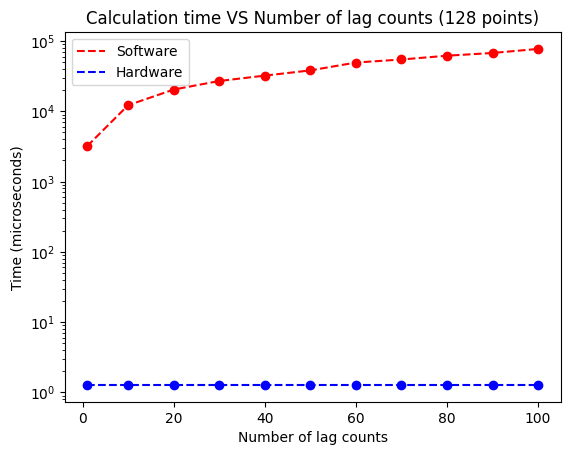

In [45]:
## Values recorded manually from time operator
num_of_lags = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
lag_time_sw = [16, 61.1, 102, 135, 161, 191, 247, 273, 309, 338, 386] ## milliseconds
lag_time_hw = []

## Hardware time is constant for every an arbitrary number of lag values
for i in lag_time_sw:
    lag_time_hw.append(1.28)
for i in range(len(lag_time_sw)):
    lag_time_sw[i] = (lag_time_sw[i]/50)*10e3   

## Plot graph    
fig2, ax4 = plt.subplots()
ax4.scatter(num_of_lags, lag_time_sw, color = 'r')
ax4.plot(num_of_lags, lag_time_sw, 'r--', label = 'Software')
ax4.scatter(num_of_lags, lag_time_hw, color = 'b')
ax4.plot(num_of_lags, lag_time_hw, 'b--', label = 'Hardware')
ax4.set_yscale('log')

ax4.set_ylabel('Time (microseconds)')
ax4.set_xlabel('Number of lag counts')
ax4.set_title('Calculation time VS Number of lag counts (128 points)')
ax4.legend()

6 6


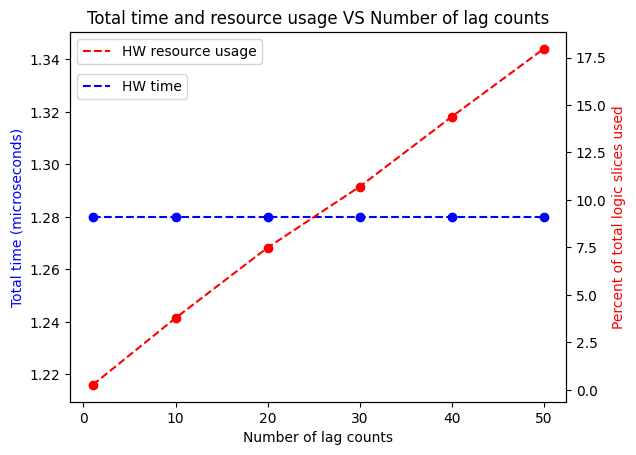

In [69]:
## Resource usage for different lag counts
lag_time_hw = []
lag_count_memory = [923, 13462, 26664, 38095, 51204, 63948]
for i in range(len(lag_count_memory)):
    lag_count_memory[i] = (lag_count_memory[i]/356160)*100 
for i in range(6):
    lag_time_hw.append(1.28)
num_of_lags = [1, 10, 20, 30, 40, 50]

print(len(num_of_lags), len(lag_time_hw))
fig, ax7 = plt.subplots()

ax8 = ax7.twinx()

ax7.scatter(num_of_lags, lag_time_hw, color = 'b')
ax7.plot(num_of_lags, lag_time_hw, 'b--', label = 'HW time')

ax8.scatter(num_of_lags, lag_count_memory, color = 'r')
ax8.plot(num_of_lags, lag_count_memory,'r--', label = 'HW resource usage')

ax7.set_xlabel('Number of lag counts')
ax7.set_ylabel('Total time (microseconds)')
ax8.set_ylabel('Percent of total logic slices used')

ax7.set_title('Total time and resource usage VS Number of lag counts')
ax7.legend(bbox_to_anchor=(0,0.8), loc = 'lower left')
ax8.legend()

ax7.yaxis.label.set_color('blue') 
ax8.yaxis.label.set_color('red') 

plt.show()

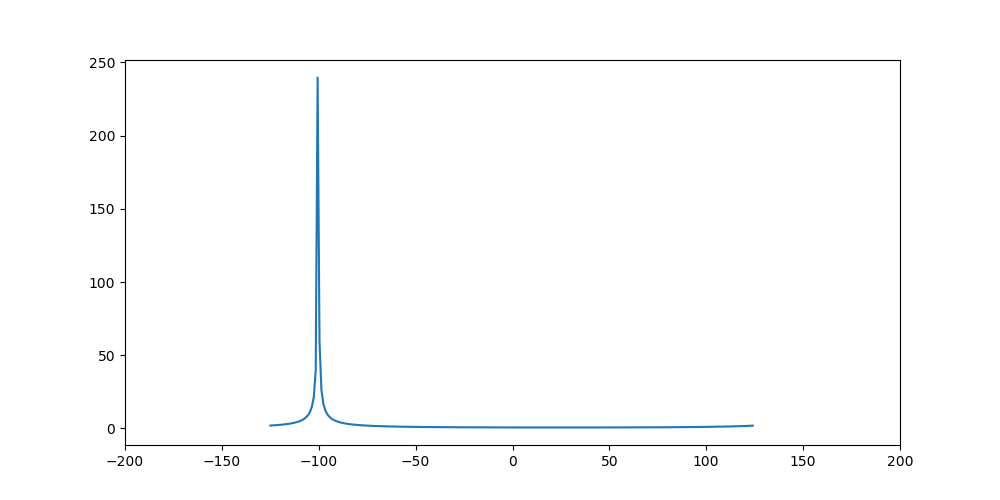

In [296]:
## TESTING CODE
sample_frequency = 250e3  # 200 kHz
sample_interval = 1 / sample_frequency
samples = 256  # you don't necessarily have to use a power of 2
time = np.linspace(0, samples*sample_interval, samples)

signal_frequency = 100e3  # 78 kHz
signal = np.exp(-2j*np.pi*signal_frequency*time)

signal_spectrum = np.fft.fftshift(np.fft.fft(signal))
freqs = np.fft.fftshift(np.fft.fftfreq(samples, d=sample_interval))

plt.figure(figsize=(10,5))
plt.plot(freqs / 1e3, np.abs(signal_spectrum))  # in kHz
plt.xlim(-200, 200)
plt.show()

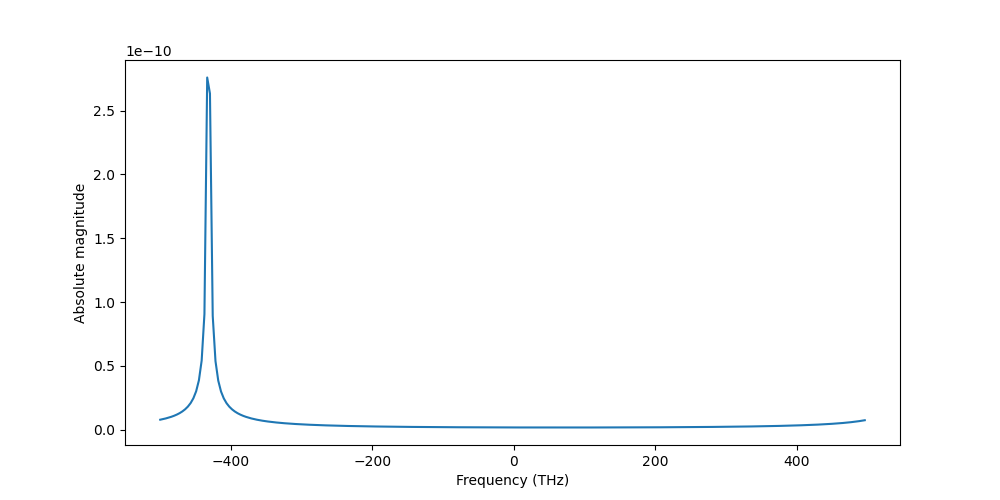

In [297]:
sample_frequency = 1e15 # 200 kHz
sample_interval = 1 / sample_frequency
samples = 256  # you don't necessarily have to use a power of 2
time = np.linspace(0, samples*sample_interval, samples)

## Trying to model Hana's Lorentzian

k_m = 20e6 ## 20 MHz
pump_omega = 430e12 ## 430 THz
mw_omega = 4e9 ## 4 GHz
b_in = 1
big_b = (np.sqrt(k_m)*b_in)/(2j*np.pi*(mw_omega - pump_omega) + (k_m/2))
small_b = big_b*np.exp(-2j*np.pi*pump_omega*time)

## Trying to model Hana's Lorentzian

signal_spectrum = np.fft.fftshift(np.fft.fft(small_b))
signal_wo_b = np.fft.fftshift(np.fft.fft(np.exp(-2j*np.pi*pump_omega*time)))
freqs = np.fft.fftshift(np.fft.fftfreq(samples, d=sample_interval))

plt.figure(figsize=(10,5))
plt.plot(freqs / 1e12, np.abs(signal_spectrum))  # in THz
# plt.plot(freqs / 1e12, np.abs(signal_wo_b), color = 'r')
# plt.ylim(0, 5)
plt.xlabel('Frequency (THz)')
plt.ylabel('Absolute magnitude')
plt.show()